# Marking the states for future

Phase encoding is important technique, which can allow to make MASSIVE PARALLEL computations (full superposition).

Let's do a simple conditional circuit, which will mark all the states less than 4.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt
from qiskit.circuit.library import XGate
cccx = XGate().control(3)
ccccx = XGate().control(4)

In [2]:
a = QuantumRegister(5, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(a, cr)

# total superposition, keep one for a sign!
qc.h(a[:4])
qc.barrier()

def minus4(qc, a):
    qc.x(a[2])
    qc.cx(a[2], a[3])
    qc.ccx(a[2], a[3], a[4])
    qc.barrier()

def plus4(qc, a):
    # TODO implement

minus4(qc, a) 

# here you CAN have conditional phase shift to pick ONE state
# but we only care of ALL those states, where MINUS is in front.
# Negative numbers are those, where a[4] = 1

# TODO what should we do?

# uncomputing
plus4(qc, a)
qc.draw(output='mpl')
plt.show()

What should you observe in these 16 states?

In [3]:
job = execute(qc, Aer.get_backend('statevector_simulator'))
result = job.result()
vector = result.get_statevector(qc)

for i in range(16):
    print(f"{i:04b}\t{i}\t{vector[i]}")

0000	0	(-0.25000000000000006+0j)
0001	1	(-0.25000000000000006+0j)
0010	2	(-0.25000000000000006+0j)
0011	3	(-0.25+0j)
0100	4	(0.25000000000000006+0j)
0101	5	(0.25+0j)
0110	6	(0.25+0j)
0111	7	(0.24999999999999994+0j)
1000	8	(0.25000000000000006+0j)
1001	9	(0.25+0j)
1010	10	(0.25+0j)
1011	11	(0.24999999999999994+0j)
1100	12	(0.25+0j)
1101	13	(0.24999999999999994+0j)
1110	14	(0.24999999999999994+0j)
1111	15	(0.24999999999999992+0j)


## Extra: Amplitude amplification

This is a building block of Grover's search algorithm -- mirror gate, or AA. But this also works in any situation, when you need to convert phases to amplitudes.

Unfortunately, to make difference, you need sometimes to run it multiple times together with the circuit. How many? See in future labs!

In [ ]:
from qiskit.circuit.library import ZGate
cccz = ZGate().control(3)

def mirror(qc, a):
    qc.barrier()
    qc.h(a)
    qc.x(a)
    qc.append(cccz, a)
    qc.x(a)
    qc.h(a)
    qc.barrier()

# change th range to see how the graph changes. NB - rerun the whole notebook!
for i in range(1):
    mirror(qc, a[:4])

qc.measure(a[:4], cr)
qc.draw(output='mpl')

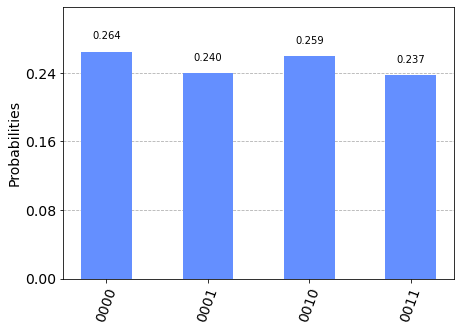

In [5]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)